# PERSONAL DETAILS

- Project: Gender Classification using CNN (from scratch)

- Name: Patrick Kendrex L. Lucero

- Professor: Jeffrey S. Sarmiento

- Subject: MSAI 512 - Deep Learning

- Date: October 1, 2022

# IMPORTING PACKAGES AND LIBRARIES

In [32]:
import os
import time
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image
from datetime import datetime
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.preprocessing import LabelBinarizer

# DEFINING FUNCTIONS

In [26]:
def load_dataset(DIRECTORY, CATEGORIES):
    data = []
    labels = []
    for category in CATEGORIES:
        path = os.path.join(DIRECTORY, category)
        for img in os.listdir(path)[0:9000]:
            img_path = os.path.join(path, img)
            image = load_img(img_path, target_size=(224, 224))
            image = img_to_array(image)
            image = preprocess_input(image)
            data.append(image)
            labels.append(category)
    lb = LabelBinarizer()
    labels = lb.fit_transform(labels)
    data = np.array(data, dtype="float32")
    labels = np.array(labels)
    return data, labels

def save_as_numpy(array, filename):
    with open(filename, 'wb') as f:
        np.save(f, array)
        return f"Saved to filepath: {filename}"

def load_numpy(filename):
    with open(filename, 'rb') as f:
        array = np.load(f)
    return array

def create_tensorboard_callback(filepath):
    logdir = os.path.join(
        filepath, 
        datetime.now().strftime("%y%m%d-%H%M%S")
    ) 
    return TensorBoard(logdir)

def train(X_train, y_train, batch_size, epochs, callbacks):
    model = Sequential([
        Conv2D(
            filters=32, 
            kernel_size=(3,3), 
            activation='relu', 
            input_shape=(224, 224, 3)
        ),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(
            filters=32, 
            kernel_size=(3,3), 
            activation = 'relu'
        ),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(64, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ])

    model.compile(
        loss = 'binary_crossentropy', 
        optimizer = 'adam', 
        metrics = ['accuracy']
    )

    model.fit(
        X_train, 
        y_train, 
        epochs=epochs, 
        batch_size=batch_size,
        callbacks=callbacks
    )
    
    now = datetime.now()
    model_name = f'models/model_{now.strftime("%d-%m-%Y_%H-%M-%S")}'
    return model.save(model_name, save_format="h5")



# LOADING AND PREPROCESSING OF DATASET
- 9000 images of Men's faces
- 9000 images of Women's faces

In [12]:
CATEGORIES = ["man", "woman"]
TRAIN_DIRECTORY = "dataset/faces/train"
X_train, y_train = load_dataset(TRAIN_DIRECTORY, CATEGORIES)
print("Data Shape:", X_train.shape)
print("Labels Shape", y_train.shape)

Data Shape: (18000, 224, 224, 3)
Labels Shape (18000, 1)


# SAVING PREPROCESSED DATA AS NUMPY FILES

In [4]:
print(save_as_numpy(X_train, "dataset/train_faces_data.npy"))
print(save_as_numpy(y_train, "dataset/train_faces_label.npy"))

Saved to filepath: dataset/train_faces_data.npy
Saved to filepath: dataset/train_faces_label.npy


# LOADING NUMPY FILES

In [27]:
X_train = load_numpy("dataset/train_faces_data.npy")
y_train = load_numpy("dataset/train_faces_label.npy")
print(X_train.shape)
print(y_train.shape)

(18000, 224, 224, 3)
(18000, 1)


# VISUALIZING SAMPLE DATA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '9015th image')

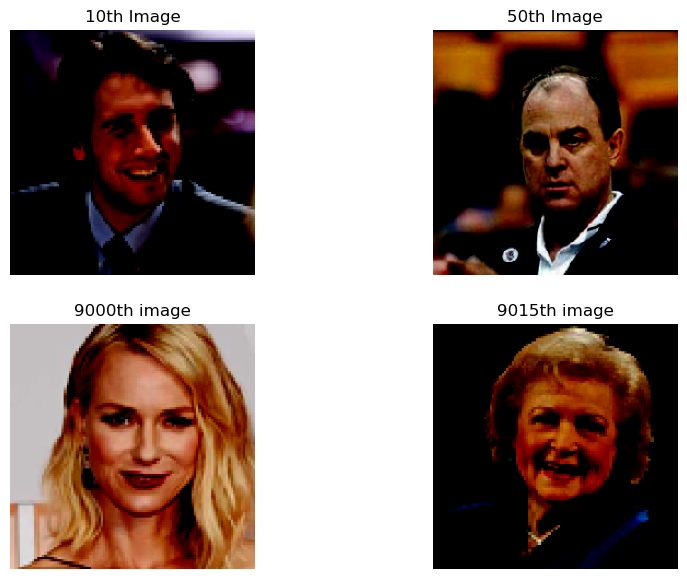

In [28]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(X_train[10])
plt.axis('off')
plt.title("10th Image")
fig.add_subplot(rows, columns, 2)
plt.imshow(X_train[50])
plt.axis('off')
plt.title("50th Image")
fig.add_subplot(rows, columns, 3)
plt.imshow(X_train[9000])
plt.axis('off')
plt.title("9000th image")
fig.add_subplot(rows, columns, 4)
plt.imshow(X_train[9050])
plt.axis('off')
plt.title("9015th image")

In [54]:
# Load TensorBoard notebook extension
%load_ext tensorboard
filepath= "training_logs"
tensorboard = create_tensorboard_callback(filepath)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


2022-10-01 22:54:45.540348: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-10-01 22:54:45.540368: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-10-01 22:54:45.541768: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


# CNN TRAINING

In [16]:
print("\n\n[INFO] Starting Training...")
start = time.time()
train(X_train, y_train, batch_size=16, epochs=8, callbacks=tensorboard)
end = time.time()
print(f"\n\nTRAINING COMPLETED!! PROCESSING TIME: {end - start}\n\n")



[INFO] Starting Training...
Metal device set to: Apple M1


2022-10-01 14:48:13.929096: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-01 14:48:13.929586: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-10-01 14:48:14.443413: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-01 14:48:14.444050: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-01 14:48:14.622877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/8
   2/1125 [..............................] - ETA: 3:46 - loss: 2.1164 - accuracy: 0.4375 

2022-10-01 14:48:15.570123: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-10-01 14:48:15.570138: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-10-01 14:48:15.734246: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-10-01 14:48:15.735293: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-10-01 14:48:15.737711: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: training_logs/221001-144757/train/plugins/profile/2022_10_01_14_48_15
2022-10-01 14:48:15.738429: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to training_logs/221001-144757/train/plugins/profile/2022_10_01_14_48_15/PLucero-EDP-100-629.local.trace.json.gz
2022-10-01 14:48:15.740902: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: training_logs/22100

1125/1125 [==============================] - 181s 160ms/step - loss: 0.5558 - accuracy: 0.7172
Epoch 2/8
1125/1125 [==============================] - 183s 163ms/step - loss: 0.3909 - accuracy: 0.8172
Epoch 3/8
1125/1125 [==============================] - 184s 163ms/step - loss: 0.2396 - accuracy: 0.9007
Epoch 4/8
1125/1125 [==============================] - 184s 163ms/step - loss: 0.0954 - accuracy: 0.9664
Epoch 5/8
1125/1125 [==============================] - 182s 162ms/step - loss: 0.0369 - accuracy: 0.9899
Epoch 6/8
1125/1125 [==============================] - 182s 162ms/step - loss: 0.0253 - accuracy: 0.9941
Epoch 7/8
1125/1125 [==============================] - 181s 161ms/step - loss: 0.0234 - accuracy: 0.9939
Epoch 8/8
1125/1125 [==============================] - 182s 162ms/step - loss: 0.0185 - accuracy: 0.9951


TRAINING COMPLETED!! PROCESSING TIME: 1461.3212018013




# MODEL EVALUATION

### FIRST DATASET
- 250 men faces
- 250 women faces

In [20]:
TEST_CATEGORIES = ["man", "woman"]
TEST_DATASET_1 = "dataset/faces/test/dataset_1"
X_test_1, y_test_1 = load_dataset(TEST_DATASET_1, TEST_CATEGORIES)
print("Test_Dataset_1 Shape: ", X_test_1.shape)
print("Test_Labels_1 Shape: ", y_test_1.shape)

Test_Dataset_1 Shape:  (500, 224, 224, 3)
Test_Labels_1 Shape:  (500, 1)


In [27]:
model = load_model("models/model_01-10-2022_15-12-35")
accuracy_1 = model.evaluate(X_test_1, y_test_1, callbacks=tensorboard, batch_size=1)

2022-10-01 15:29:22.820134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - 61s 121ms/step - loss: 1.1732 - accuracy: 0.7660


### SECOND DATASET
- 170 men faces
- 170 women faces

In [35]:
TEST_CATEGORIES = ["man", "woman"]
TEST_DATASET_2 = "dataset/faces/test/dataset_2"
X_test_2, y_test_2 = load_dataset(TEST_DATASET_2, TEST_CATEGORIES)
print("Test_Dataset_2 Shape: ", X_test_2.shape)
print("Test_Labels_2 Shape: ", y_test_2.shape)

Test_Dataset_2 Shape:  (340, 224, 224, 3)
Test_Labels_2 Shape:  (340, 1)


In [36]:
model = load_model("models/model_01-10-2022_15-12-35")
accuracy_1 = model.evaluate(X_test_2, y_test_2, callbacks=tensorboard, batch_size=1)


  1/340 [..............................] - ETA: 1:04 - loss: 2.8920e-06 - accuracy: 1.0000

2022-10-01 15:51:11.951531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


340/340 [==============================] - 42s 123ms/step - loss: 0.2967 - accuracy: 0.9088


### THIRD DATASET
- 150 men faces
- 150 women faces

In [44]:
TEST_CATEGORIES = ["man", "woman"]
TEST_DATASET_3 = "dataset/faces/test/dataset_3"
X_test_3, y_test_3 = load_dataset(TEST_DATASET_3, TEST_CATEGORIES)
print("Test_Dataset_3 Shape: ", X_test_3.shape)
print("Test_Labels_3 Shape: ", y_test_3.shape)

Test_Dataset_3 Shape:  (300, 224, 224, 3)
Test_Labels_3 Shape:  (300, 1)


In [45]:
model = load_model("models/model_01-10-2022_15-12-35")
accuracy_1 = model.evaluate(X_test_3, y_test_3, callbacks=tensorboard, batch_size=1)


  1/300 [..............................] - ETA: 53s - loss: 0.0669 - accuracy: 1.0000

2022-10-01 17:42:34.141564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


300/300 [==============================] - 36s 118ms/step - loss: 0.2595 - accuracy: 0.9267


# RESULTS SUMMARY

1. Test Dataset 1: 
* Accuracy - 76.60%, 
* Loss - 1.1732

2. Test Dataset 2: 
* Accuracy - 90.88%, 
* Loss - 0.2967

3. Test Dataset 3: 
* Accuracy - 92.67% 
* Loss - 0.2595

# RESULTS VISUALIZATION

In [55]:
%tensorboard --logdir training_logs

Reusing TensorBoard on port 6007 (pid 53118), started 8:13:05 ago. (Use '!kill 53118' to kill it.)

# FACE DETETECTION WITH GENDER CLASSIFICATION IMAGE INFERENCE

In [15]:
prototxtPath = "models/face_detector/deploy.prototxt"
weightsPath = "models/face_detector/res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)
model = load_model("models/model_01-10-2022_15-12-35")
image_path = "images/"

def detect_face_and_gender(frame, faceNet, model):
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224),
        (104.0, 177.0, 123.0))
    faceNet.setInput(blob)
    detections = faceNet.forward()
    faces = []
    locs = []
    preds = []
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
            face = frame[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)
            faces.append(face)
            locs.append((startX, startY, endX, endY))
    if len(faces) > 0:
        faces = np.array(faces, dtype="float32")
        preds = model.predict(faces, batch_size=32)
    return (locs, preds)

def infer(img):
    frame = imutils.resize(img, width=600)
    (locs, preds) = detect_face_and_gender(frame, faceNet, model)
    for (box, pred) in zip(locs, preds):
        (startX, startY, endX, endY) = box
        print(pred)
        label = "Man" if pred[0] <0.5 else "Woman"
        color = (100, 0, 200) if label == "Woman" else (200, 100, 0)
        cv2.putText(frame, label, (startX, startY - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)
    return plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

2022-10-01 18:11:49.982775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[0.22887352]
[0.9357291]


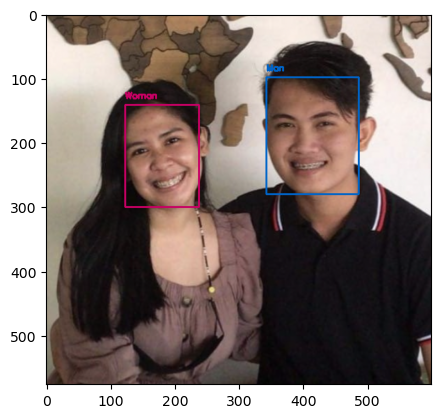

In [16]:
img = cv2.imread("images/sample_image_1.png")
infer(img)

[0.00040037]
[0.99983805]


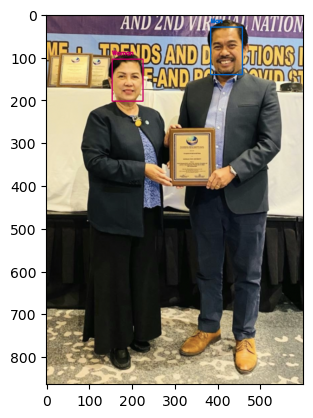

In [17]:
img_2 = cv2.imread("images/sample_image_2.png")
infer(img_2)

# MODEL ARCHITECTURE

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5972032   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

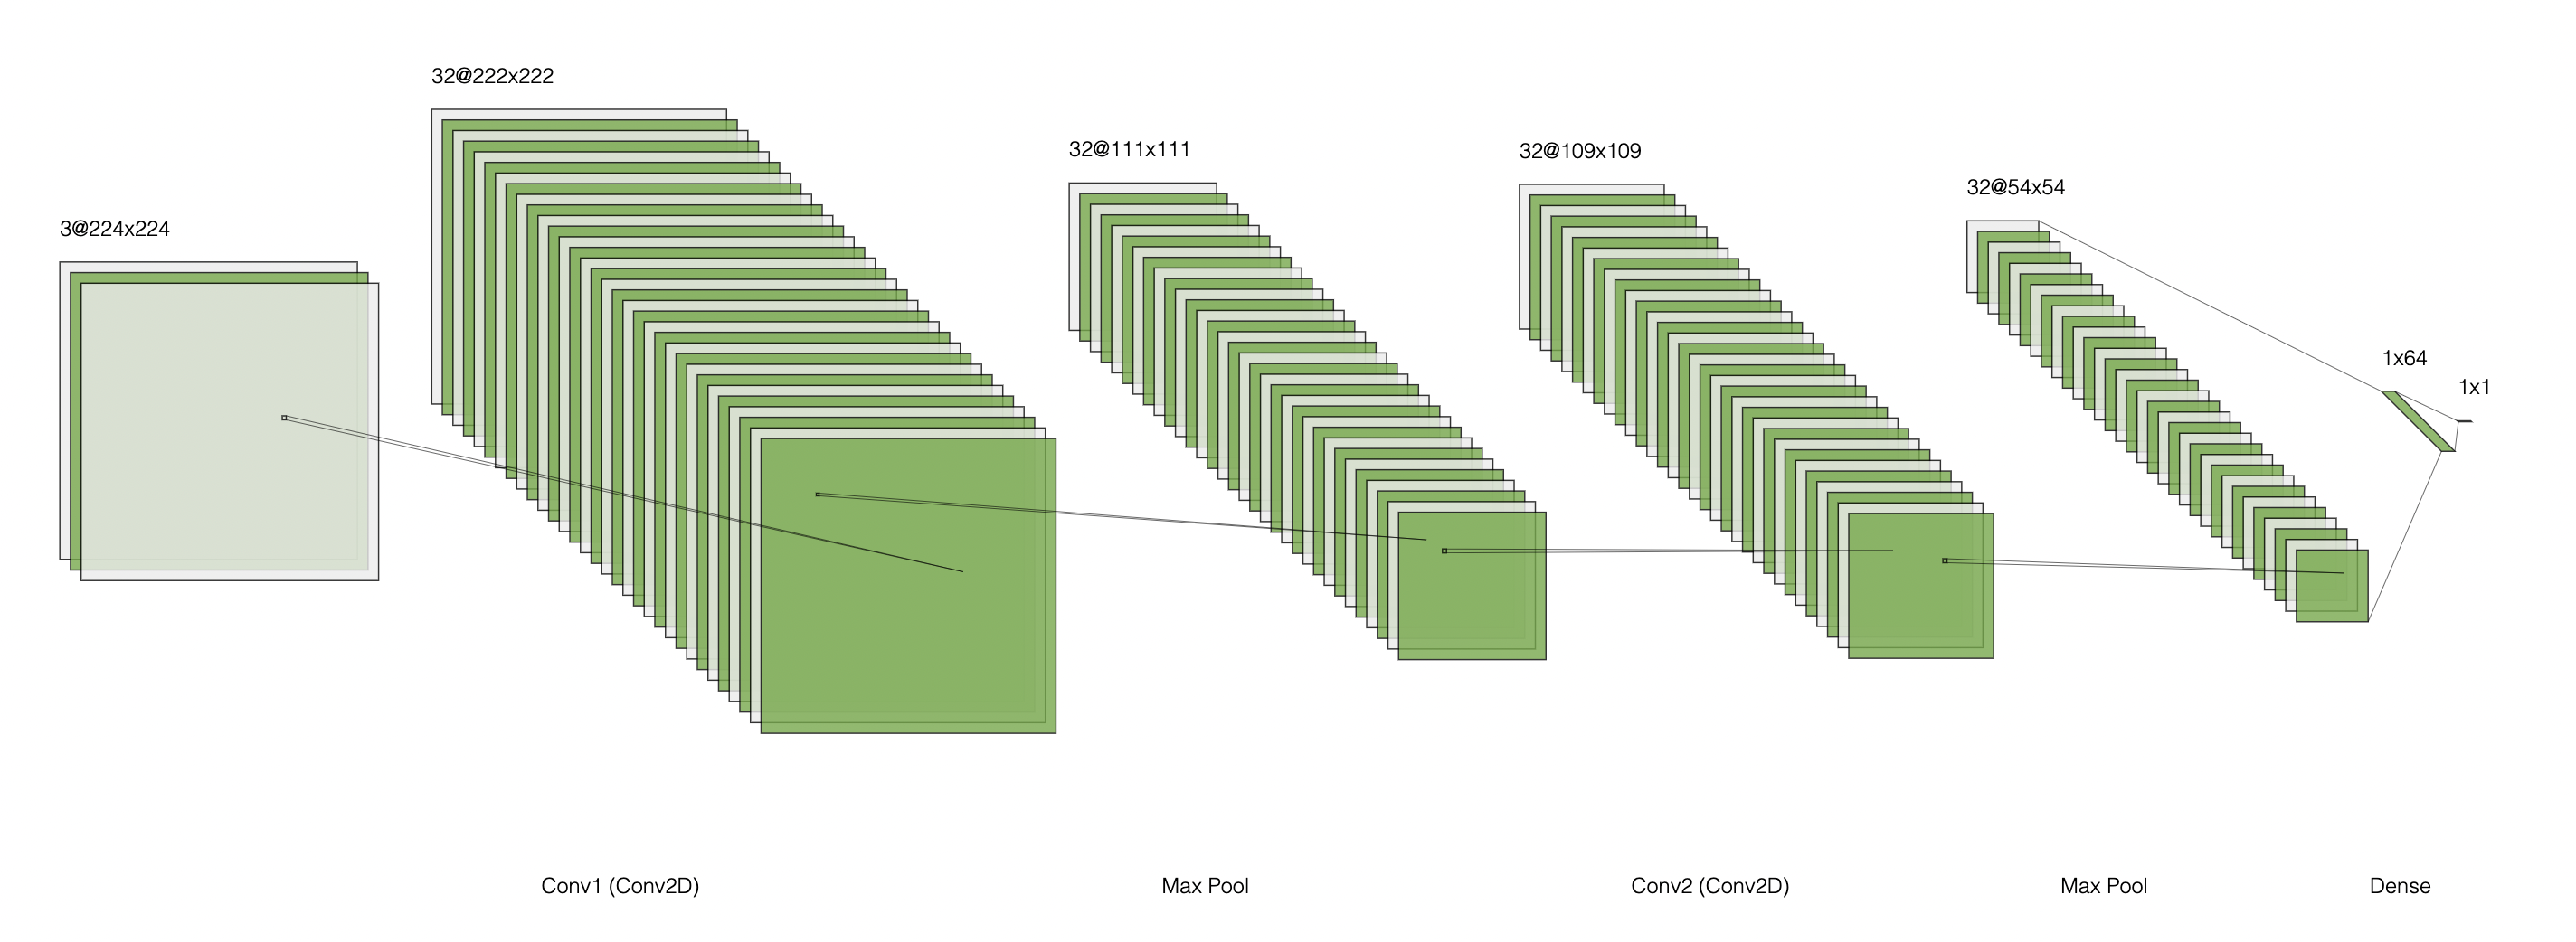

In [33]:
Image(filename='model_architecture.png') 